In [2]:
import pandas as pd
from pathlib import Path
import rasterio as rio

In [3]:
PARENT_DIR = Path(r"/home/iborlafm/Downloads/Mozambique/hls")
RASTER_DIR = PARENT_DIR / "automated"

In [4]:
stat_list = ["min", "max", "mean", "std"]

row_pairs = {}
for raster_path in RASTER_DIR.glob("HLS*bands.tif"):

    with rio.open(raster_path) as raster:

        # Retrieve band names and statistics
        stat_pairs = {}
        for band_name, band_stats in zip(raster.descriptions, raster.stats()):
            for stat in stat_list:
                stat_pairs[f"{band_name}_{stat}"] = getattr(band_stats, stat)
    
    row_pairs[raster_path.stem] = stat_pairs

In [5]:
stats_frame = pd.DataFrame(row_pairs).T

In [6]:
mean_frame = stats_frame[[c for c in stats_frame.columns if c.endswith("mean")]]

In [7]:
medians = mean_frame.median(axis=0)
residuals = mean_frame.subtract(medians, axis=1)
mads = residuals.abs().median(axis=0)

sigmas = (1.4826 * mads)

In [8]:
zscores = residuals.divide(sigmas)

In [9]:
has_outliers = zscores.gt(3.5).any(axis=1)

In [10]:
zscores.loc[has_outliers].sort_values("Red_mean", ascending=False).head(3)

,Blue_mean,Green_mean,Red_mean,NIRnarrow_mean,SWIR1_mean,SWIR2_mean
HLS_T36KXE_2019249T074136_L30_v2.0_bands,9.155497,8.146905,6.068600,1.403657,2.696629,2.347261
HLS_T36KXE_2023228T073621_S30_v2.0_bands,8.921898,8.219705,5.961285,1.610770,2.865040,2.292273
HLS_T36KXE_2020252T074135_L30_v2.0_bands,8.853181,7.885687,5.894348,1.340035,3.056189,2.685348


In [18]:
sensor  = mean_frame.index.str[26:29]

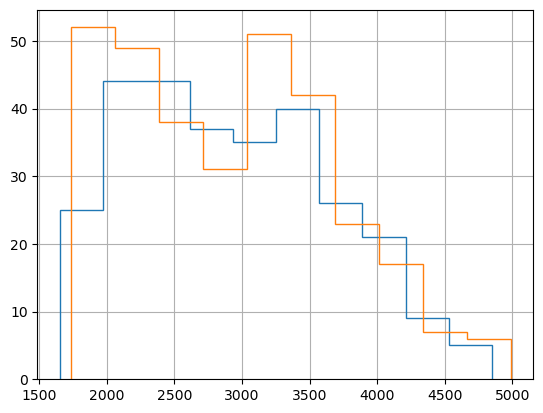

In [26]:
for _, sensor_records in mean_frame.groupby(sensor):

    sensor_records["NIRnarrow_mean"].hist(bins="auto", histtype="step")

In [ ]:
mean_frame.loc[excesses]

,Blue_mean,Green_mean,Red_mean,NIRnarrow_mean,SWIR1_mean,SWIR2_mean
HLS_T36KXE_2023228T074119_L30_v2.0_bands,3026.300944,3172.173057,3264.287524,4259.130902,3458.138743,2510.366165
HLS_T36KXE_2022328T074807_L30_v2.0_bands,1684.878498,1986.945604,1915.804634,3614.198530,2840.035875,1990.733881
HLS_T36KXE_2020029T074049_S30_v2.0_bands,1758.406517,2091.119755,1921.371862,4456.203905,2488.584878,1478.298767
HLS_T36KXE_2023063T073819_S30_v2.0_bands,1824.129225,2150.016339,1997.633932,4483.684739,2664.680339,1596.332158
HLS_T36KXE_2019309T074111_S30_v2.0_bands,2119.144802,2384.099087,2444.223553,3683.294998,3311.745221,2480.909788
...,...,...,...,...,...,...
HLS_T36KXE_2023276T074130_L30_v2.0_bands,2272.318352,2452.397328,2591.666784,3464.907671,3715.769839,2898.655750
HLS_T36KXE_2023076T074156_L30_v2.0_bands,2406.068731,2615.237415,2502.791384,4672.831887,2756.791559,1718.216150
HLS_T36KXE_2020332T074143_L30_v2.0_bands,1860.775433,2207.627787,2264.267089,3450.002397,3458.198864,2546.472553
HLS_T36KXE_2024283T073821_S30_v2.0_bands,2834.457148,3075.138399,3136.200433,4128.162554,3674.577857,2819.693540
